<a href="https://colab.research.google.com/github/magemongo/ContentLovers/blob/master/Scrapping_Publisher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Links do portal GuiadeMidia.com**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
req = Request('https://www.guiademidia.com.br/jornais.htm', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BeautifulSoup(webpage, 'lxml')
type(soup)

bs4.BeautifulSoup

In [ ]:
As = soup.find_all('a')

In [ ]:
As

[<a href="https://www.guiademidia.com.br"> <img alt="Logo Site Guia de Mídia" src="imagens/logo/v7/logo-guia-de-midia-120x72.png"/></a>,
 <a class="letra-cor3" href="https://www.guiademidia.com.br">home</a>,
 <a class="vermelhao" href="https://www.guiademidia.com.br/jornaisdesaopaulo.htm">Jornais de SP</a>,
 <a class="letra-cor6" href="https://www.guiademidia.com.br/jornaisdoriodejaneiro.htm">Jornais do Rio</a>,
 <a href="https://www.guiademidia.com.br/jornaisdoacre.htm" title="Jornais Acreanos">Jornais do Acre</a>,
 <a href="https://www.guiademidia.com.br/acre/jornais-de-rio-branco.htm" title="Jornais de Rio Branco AC">Rio Branco</a>,
 <a href="https://www.guiademidia.com.br/jornaisdealagoas.htm" title="Jornais Alagoanos">Jornais de Alagoas</a>,
 <a href="https://www.guiademidia.com.br/alagoas/jornais-de-maceio.htm" title="Jornais de Maceió AL">Maceió</a>,
 <a href="https://www.guiademidia.com.br/jornaisdoamapa.htm" title="Jornais Amapaenses">Jornais do Amapá</a>,
 <a href="https://ww

In [ ]:
first = soup.find(text="Jornais do Rio")

In [ ]:
jb_links = first.find_all_next('a')

In [ ]:
links_jb = []
for a in jb_links:
  if a.get('href')!= 'agenciasdenoticias.htm':
    links_jb.append(a.get('href'))
  else:
    break

In [ ]:
links_jb_estado = []
links_jb_capital = []
links_sp_capital = []

for link in links_jb:
  if link.count('/') == 3:
    links_jb_estado.append(link)
  elif link.count('/') == 4:
    links_jb_capital.append(link)
  else:
    links_sp_capital.append(link)

# **Função para Scrappy dos Jornais**

In [ ]:
import re

def scrappy_jornais(tag, class_, soup, dic):

  dic_temp = dic
  dic_temp['nome'] = dic['nome']
  dic_temp['link'] = dic['link']

  if class_ == '':
    rows = soup.find_all(tag)
  else:
    rows = soup.find_all(tag, class_= class_)

  for row in rows:
    cells = row.find_all('a')
    str_cells = str(cells)
    clean_names = re.compile('<.*?>')
    clean = (re.sub(clean_names, '',str_cells))
    dic['nome'].append(clean.rstrip('[]'))

  for row in rows:
    links = row.find_all('a')
    str_links = str(links)
    clean_links = re.compile("((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*")
    clean = (re.search(clean_links, str_links))
    pre_link = str(clean).split('match=')
    if len(pre_link) > 1:
      dic['link'].append(pre_link[1].rstrip('>'))
    else:
      dic['link'].append(pre_link[0].rstrip('None'))
  return dic

# **Scrapping Jornais Brasileiros por Estado**
lista = links_jb_estado

In [ ]:
c = 0
dados = {}
dados['nome'] = []
dados['link'] = []

for link in links_jb_estado:
  req = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
  c += 1
  print("site", c)
  webpage = urlopen(req).read()
  soup = BeautifulSoup(webpage, 'lxml')

  scrappy_jornais('tr','', soup, dados)

site 1
site 2
site 3
site 4
site 5
site 6
site 7
site 8
site 9
site 10
site 11
site 12
site 13
site 14
site 15
site 16
site 17
site 18
site 19
site 20
site 21
site 22
site 23
site 24
site 25
site 26
site 27


In [ ]:
df = pd.DataFrame(dados)
df.tail()

,nome,link
3758,[Blog Jaciara Barros,'http://www.jaciarabarros.com.br/'
3759,[Blog Palmas Aqui,'https://palmasaqui.wordpress.com/'
3760,[Blog Cidade Interativa Almas TO,'http://cialmas.blogspot.com.br/'
3761,[Blog do Luiz Martins,'http://www.luizmartins.net/'
3762,[Blogs,'https://www.guiademidia.com.br/blogs/jornalis...


In [ ]:
import numpy as np

df.replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)

In [ ]:
df

,nome,link
2,[A Gazeta do Acre,'http://www.agazetadoacre.com'
3,[Jornal Página 20,'http://www.pagina20.net'
4,[O Rio Branco,'http://www.oriobranco.net/'
5,[A Tribuna do Acre,'http://www.jornalatribuna.com.br/'
6,[Jornal Opinião,'http://www.jornalopiniao.net/'
...,...,...
3758,[Blog Jaciara Barros,'http://www.jaciarabarros.com.br/'
3759,[Blog Palmas Aqui,'https://palmasaqui.wordpress.com/'
3760,[Blog Cidade Interativa Almas TO,'http://cialmas.blogspot.com.br/'
3761,[Blog do Luiz Martins,'http://www.luizmartins.net/'


In [ ]:
df.to_excel('/content/publishers_estados.xls')

# **Scrapping Jornais Brasileiros por Capital**

lista = links_jb_capital

In [ ]:
c = 0
dados = {}
dados['nome'] = []
dados['link'] = []

for link in links_jb_capital:
  req = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
  c += 1
  webpage = urlopen(req).read()
  soup = BeautifulSoup(webpage, 'lxml')
  #print(soup.find("div", class_="lista"))
  if soup.find("div", class_="lista") != None:
    pre_rows = soup.find("div", class_="lista")
    print("site", c, "no class:", link)
    for pre_row in pre_rows:
      scrappy_jornais("p", "", soup, dados)
  
  elif soup.find("tr", class_="unnamed1") != None:
    print("site", c, "unnamed1 tr:", link)
    scrappy_jornais('tr',"unnamed1", soup, dados)
  
  elif soup.find("td", class_="unnamed1") != None:
    print("site", c, "unnamed1 td:", link)

  elif soup.find("td", class_="jornais") != None:
    print("site", c, "jornais:", link)
    scrappy_jornais('td',"jornais", soup, dados)
  else:
    print("site", c, "conteudo:", link)
    scrappy_jornais('div',"conteudo", soup, dados)

site 1 no class: https://www.guiademidia.com.br/acre/jornais-de-rio-branco.htm
site 2 no class: https://www.guiademidia.com.br/alagoas/jornais-de-maceio.htm
site 3 no class: https://www.guiademidia.com.br/amapa/jornais-de-macapa.htm
site 4 no class: https://www.guiademidia.com.br/amazonas/jornais-de-manaus.htm
site 5 unnamed1 tr: https://www.guiademidia.com.br/bahia/jornais-de-salvador.htm
site 6 unnamed1 tr: https://www.guiademidia.com.br/ceara/jornais-de-fortaleza.htm
site 7 unnamed1 tr: https://www.guiademidia.com.br/distrito-federal/jornais-de-brasilia.htm
site 8 unnamed1 td: https://www.guiademidia.com.br/espirito-santo/jornais-de-vitoria.htm
site 9 unnamed1 td: https://www.guiademidia.com.br/goias/jornais-de-goiania.htm
site 10 unnamed1 tr: https://www.guiademidia.com.br/maranhao/jornais-de-sao-luis.htm
site 11 unnamed1 td: https://www.guiademidia.com.br/mato-grosso/jornais-de-cuiaba.htm
site 12 unnamed1 tr: https://www.guiademidia.com.br/mato-grosso-do-sul/jornais-de-campo-grand

In [ ]:
df = pd.DataFrame(dados)
df.tail()

,nome,link
17153,[Portal\nda Ilha,'http://www.portaldailha.com.br'
17154,"[Portal\nduCampeche,",'http://ducampeche.com.br/'
17155,[TV Jurerê,'http://www.tvjurere.com.br'
17156,[Portal Hoje News,'https://hoje.news/'
17157,,


In [ ]:
df.replace('',np.nan,inplace=True)
df.dropna(axis=0, inplace=True)
df.drop_duplicates('link', keep='first',inplace=True)
df.describe()

,nome,link
count,522,522
unique,520,522
top,[Notícias de Maceió,'https://www.guiademidia.com.br/roraima/jornai...
freq,2,1


In [ ]:
df.to_excel('/content/publishers_capitais.xls')

# **API da AWS com trafficInfo de sites**

In [ ]:
! git clone https://github.com/magemongo/alexa-web-information-service-api-samples
%cd /content/alexa-web-information-service-api-samples/python
! pip install requests
! pip install -r requirements.txt

Cloning into 'alexa-web-information-service-api-samples'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 260 (delta 50), reused 24 (delta 7), pack-reused 146
Receiving objects: 100% (260/260), 83.22 KiB | 7.57 MiB/s, done.
Resolving deltas: 100% (109/109), done.
/content/alexa-web-information-service-api-samples/python


In [ ]:
#!python3 awis.py

# **Limpeza dos Dados da API**

In [140]:
json_file = "/content/teste.json"
with open(json_file, 'r') as handle:
  parsed = json.load(handle)

In [141]:
def fill_df(dictName,timeP, typeD):
  df = pd.DataFrame()
  tempA = []
  tempA_2 = []
  tempA_3 = []
  tempB = []
  tempC = []
  tempC_2 = []

  url_list = []
  temp_list = []

  for i in range(len(dictName['DataUrl'])):
    if typeD == 'string':
      j = str(i)
    elif typeD == 'integer':
      j = int(i)
    temp_list.append(dictName['DataUrl'][j])
  df['DataUrl'] = temp_list

  for i in range(len(dictName[timeP])):
    if typeD == 'string':
      j = str(i)
    elif typeD == 'integer':
      j = int(i)
    a = dictName[timeP][j]['PageViews']
    tempA.append(a['PerMillion']['Value'])
    tempA_2.append(a['PerUser']['Value'])
    tempA_3.append(a['Rank']['Value'])
    b = dictName[timeP][j]['Rank']
    tempB.append(b['Value'])
    c = dictName[timeP][j]['Reach']
    tempC.append(c['PerMillion']['Value'])
    tempC_2.append(c['Rank']['Value'])

  df['PageViews/Mill'] = tempA
  df['PageViews/User'] = tempA_2
  df['PageViews_Rank'] = tempA_3
  df['Rank'] = tempB
  df['Reach/Mill'] = tempC
  df['Reach_Rank'] = tempC_2
  df_name = df

  return df_name


In [142]:
df_A = pd.DataFrame()
df_A = fill_df(parsed,'1 Months', 'string')
df_A

,DataUrl,PageViews/Mill,PageViews/User,PageViews_Rank,Rank,Reach/Mill,Reach_Rank
0,agazetadoacre.com,0.14,3,298069,274260,2,288569
1,oaltoacre.com,0.13,2,318171,242742,2.5,231422
2,agencia.ac.gov.br,0.09,2,408944,336660,2,332453
3,youtube.com,"70,843",8.390,2,2,"335,000",2
4,agencia.ac.gov.br,0.09,2,408944,336660,2,332453
...,...,...,...,...,...,...,...
533,soudepalmas.com.br,0.08,2,451044,393743,1,396335
534,afnoticias.com.br,0.2,2,235618,163807,4.1,151169
535,portaldoamaral.com.br,0.16,3,272750,230115,2,232005
536,surgiu.com.br,1.3,5.2,47929,57868,10,68235


In [143]:
df_C = pd.DataFrame()
df_C = fill_df(parsed,'3 Months', 'string')
df_C

,DataUrl,PageViews/Mill,PageViews/User,PageViews_Rank,Rank,Reach/Mill,Reach_Rank
0,agazetadoacre.com,0.09,2.2,405917,327829,1.6,319590
1,oaltoacre.com,0.11,1.9,364160,270826,2.1,252967
2,agencia.ac.gov.br,0.32,2.8,155300,131946,4.4,135051
3,youtube.com,"70,242",8.030,2,2,"339,100",2
4,agencia.ac.gov.br,0.32,2.8,155300,131946,4.4,135051
...,...,...,...,...,...,...,...
533,soudepalmas.com.br,0.04,2,679786,486352,1.1,434664
534,afnoticias.com.br,0.24,1.4,193535,112372,6.8,93920
535,portaldoamaral.com.br,0.93,8.4,63184,105622,4.3,137929
536,surgiu.com.br,1.3,5.0,48713,58227,9.9,67758


In [144]:
json_file2 = "/content/teste_clean.json"
with open(json_file2, 'r') as handle:
  parsed2 = json.load(handle)

new_parse = {'3 Months': [],'1 Months': [], 'DataUrl': []}
for i in range(len(parsed2['3 Months'])):
  j = str(i)
  if parsed2['3 Months'][j] != None:
    new_parse['3 Months'].append(parsed2['3 Months'][j])
    new_parse['1 Months'].append(parsed2['1 Months'][j])
    new_parse['DataUrl'].append(parsed2['DataUrl'][j])

In [145]:
df_D = pd.DataFrame()
df_D = fill_df(new_parse,'3 Months', 'integer')
df_D

,DataUrl,PageViews/Mill,PageViews/User,PageViews_Rank,Rank,Reach/Mill,Reach_Rank
0,jornalalerta.com.br,0.18,4.0,250203,275867,1.7,309875
1,lindomarrodrigues.com,0.06,1.0,584968,336148,2.1,259236
2,giro61.com.br,0.1,2.7,394689,352912,1.4,361951
3,cariacica.es.gov.br,0.12,3.9,331723,358199,1.2,400383
4,cariacica.es.gov.br,0.12,3.9,331723,358199,1.2,400383
5,peixotoonline.com.br,0.08,1.9,433883,327966,1.7,308104
6,quatromarcosnoticias.com.br,0.14,1.7,296407,198575,3.3,176404
7,ocorreionews.com.br,0.09,2.0,408572,311814,1.8,294616
8,progresso.com.br,0.04,2,678278,550225,0.87,529499
9,portalangelica.com.br,0.03,2,872129,709900,0.6,679231


In [146]:
df_B = pd.DataFrame()
df_B = fill_df(new_parse,'1 Months', 'integer')
df_B

,DataUrl,PageViews/Mill,PageViews/User,PageViews_Rank,Rank,Reach/Mill,Reach_Rank
0,jornalalerta.com.br,0.1,3,379851,394684,1,439619
1,lindomarrodrigues.com,0.03,1,796660,497359,1,383901
2,giro61.com.br,0.1,2,382309,299102,2,287537
3,cariacica.es.gov.br,0.11,3,368034,350211,1,370109
4,cariacica.es.gov.br,0.11,3,368034,350211,1,370109
5,peixotoonline.com.br,0.05,2,611913,449053,1,403595
6,quatromarcosnoticias.com.br,0.15,2,290103,200866,3.3,182525
7,ocorreionews.com.br,0.19,2,242432,185589,3.4,179310
8,progresso.com.br,0.06,1,581178,406197,2,354176
9,portalangelica.com.br,0.08,2,454964,345770,2,325414


In [147]:
df_1_mes = pd.concat([df_A, df_B])
df_1_mes.reset_index(inplace=True)
df_1_mes.drop('index', axis=1, inplace=True)
df_3_mes = pd.concat([df_C, df_D])
df_3_mes.reset_index(inplace=True)
df_3_mes.drop('index', axis=1, inplace=True)


In [148]:
df_1_mes

,DataUrl,PageViews/Mill,PageViews/User,PageViews_Rank,Rank,Reach/Mill,Reach_Rank
0,agazetadoacre.com,0.14,3,298069,274260,2,288569
1,oaltoacre.com,0.13,2,318171,242742,2.5,231422
2,agencia.ac.gov.br,0.09,2,408944,336660,2,332453
3,youtube.com,"70,843",8.390,2,2,"335,000",2
4,agencia.ac.gov.br,0.09,2,408944,336660,2,332453
...,...,...,...,...,...,...,...
564,folharondoniense.com.br,0.04,1,782679,486241,1,374941
565,pagina3.com.br,0.12,2,347179,240561,2.7,216361
566,tudosobrefloripa.com.br,0.04,1,792460,494099,1,381313
567,bcnoticias.com.br,0.06,1,541906,365649,2,315826


# **Análise Exploratória**

In [149]:
df_3_mes.dtypes

DataUrl           object
PageViews/Mill    object
PageViews/User    object
PageViews_Rank    object
Rank              object
Reach/Mill        object
Reach_Rank        object
dtype: object

In [150]:
for column in df_3_mes:
  if column != 'DataUrl':
    c = 0
    for i in df_3_mes[column]:
      df_3_mes[column][c] = i.replace(',', '')
      c += 1
    df_3_mes[column] = df_3_mes[column].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [151]:
pos_3q = []
pre_1q = []

for column in df_3_mes:
  if column != "DataUrl":
    temp_1 = (np.quantile(df_3_mes[column],0.25))
    temp_3 = (np.quantile(df_3_mes[column],0.75))
    print(column,':', temp_3)
    print('Se for < que',(temp_1 - 1.5*(temp_3 - temp_1)),'Ou se for > que', (temp_3 + 1.5*(temp_3 - temp_1)))
    pos_3q.append(temp_3 + 1.5*(temp_3 - temp_1))
    pre_1q.append(temp_1 - 1.5*(temp_3 - temp_1))

PageViews/Mill : 1.2
Se for < que -1.5499999999999998 Ou se for > que 2.8499999999999996
PageViews/User : 2.8
Se for < que -0.6999999999999997 Ou se for > que 4.8999999999999995
PageViews_Rank : 399170.0
Se for < que -470307.5 Ou se for > que 920856.5
Rank : 264804.0
Se for < que -277498.5 Ou se for > que 590185.5
Reach/Mill : 14.0
Se for < que -15.249999999999996 Ou se for > que 31.549999999999997
Reach_Rank : 242496.0
Se for < que -240221.5 Ou se for > que 532126.5


número de registros desconsiderando os filtrados: 497


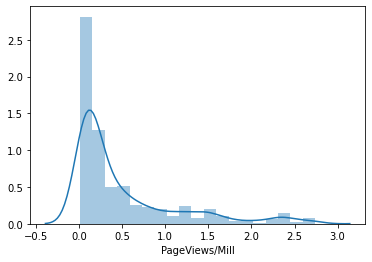

In [152]:
filter = df_3_mes['PageViews/Mill'] < 2.8499999999999996
sns.distplot(df_3_mes[filter]['PageViews/Mill'])

print('número de registros desconsiderando os filtrados:',df_3_mes[filter]['PageViews/Mill'].shape[0])

In [180]:
df_teste = pd.DataFrame()
df_teste['Site'] = df_3_mes['DataUrl'][filter]
df_teste['Projecao_PageViews'] = (df_3_mes['PageViews/Mill'][filter]*219533902793)/1000000
df_teste.reset_index(inplace=True)
df_teste.drop('index', axis=1, inplace=True)
#df_teste['Alcance'] = 
df_teste.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [181]:
df_teste.round()

,Site,Projecao_PageViews
0,agazetadoacre.com,19758.0
1,oaltoacre.com,24149.0
2,agencia.ac.gov.br,70251.0
3,contilnetnoticias.com.br,241487.0
4,ac24horas.com,263441.0
...,...,...
456,folharondoniense.com.br,6586.0
457,pagina3.com.br,35125.0
458,tudosobrefloripa.com.br,6586.0
459,bcnoticias.com.br,10977.0


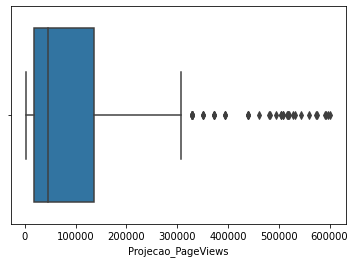

In [182]:
sns.boxplot(df_teste['Projecao_PageViews'])

In [185]:
df_teste.sort_values('Projecao_PageViews', ascending=True).head(50)

,Site,Projecao_PageViews
382,imprensanewssul.com.br,2195.339028
119,diariodebalsas.com.br,2195.339028
53,calilanoticias.com,4390.678056
412,jornaldacidade.net,4390.678056
445,patoshoje.com.br,4390.678056
186,alfenashoje.com.br,4390.678056
189,patrocinioonline.com.br,4390.678056
381,diariodajaragua.com.br,4390.678056
335,focoregional.com.br,4390.678056
300,osamigosdaonca.com.br,4390.678056
